In [72]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('../data/processed/text-preprocessed.txt', 'r') as f:
    text = f.read()

print(text)

1. KALARAHU 
Pada suatu ketika Batara Guru ingin mengadakan 
pesta besar di Kayangan Jonggring Salaka. Batara Guru 
kemudian menugas i Resi Narada untuk mengumpulkan 
para dewa dan dewi di Kayangan Jonggring Sa-laj:<a. Dalam 
pesta itu para dewa dan dewi diizinkan minum toya urip 
·air penghidupan'. Siapa saja yang telah minum air penghidupan itu dapat hidup abadi. 
Resi Narada pun segera mengumpu lkan para dewa 
dan dewi di Kayangan Jonggring Salaka. Dalam sekejap 
saja para dewa dan dewi dari segenap penjuru mata angin 
tiba di Kayangan Jonggring Salaka. Mereka berkumpul di 
pendapa istana Juggring Salaka yang sangat megah itu. 
Air penghidupan dalam cupu manik astagina telah dituangkan ke dalam botol yang terbuat dari jamrud. Botol 
jamrud itu lalu diletakkan di atas meja yang terbuat dari 
mutiara. Para pembesar dewa dan dewi dipersilakan 
mengambil air penghidupun itu lebih dahulu. Setelah itu disusul para dewa dan dewi biasa. Sangat senanglah para 
dewa dan dewi itu. Air penghidu

In [3]:
len(text)

54524

In [4]:
# The unique characters in the file
vocab = sorted(set(text))

print(f'{len(vocab)} unique characters')
print('vocab:', vocab)

78 unique characters
vocab: ['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '}', '~', '·']


In [5]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

char2index

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '/': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '5': 16,
 '6': 17,
 '7': 18,
 '8': 19,
 '9': 20,
 ':': 21,
 ';': 22,
 '<': 23,
 '?': 24,
 'A': 25,
 'B': 26,
 'C': 27,
 'D': 28,
 'E': 29,
 'F': 30,
 'G': 31,
 'H': 32,
 'I': 33,
 'J': 34,
 'K': 35,
 'L': 36,
 'M': 37,
 'N': 38,
 'O': 39,
 'P': 40,
 'R': 41,
 'S': 42,
 'T': 43,
 'U': 44,
 'V': 45,
 'W': 46,
 'Y': 47,
 '\\': 48,
 ']': 49,
 '_': 50,
 'a': 51,
 'b': 52,
 'c': 53,
 'd': 54,
 'e': 55,
 'f': 56,
 'g': 57,
 'h': 58,
 'i': 59,
 'j': 60,
 'k': 61,
 'l': 62,
 'm': 63,
 'n': 64,
 'o': 65,
 'p': 66,
 'r': 67,
 's': 68,
 't': 69,
 'u': 70,
 'v': 71,
 'w': 72,
 'y': 73,
 'z': 74,
 '}': 75,
 '~': 76,
 '·': 77}

In [6]:
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '"' "'" '(' ')' ',' '-' '.' '/' '0' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' ':' ';' '<' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K'
 'L' 'M' 'N' 'O' 'P' 'R' 'S' 'T' 'U' 'V' 'W' 'Y' '\\' ']' '_' 'a' 'b' 'c'
 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'r' 's' 't' 'u' 'v'
 'w' 'y' 'z' '}' '~' '·']


In [14]:
text_as_int = np.array([char2index[char] for char in text])

print(f'text_as_int length: {len(text_as_int)}')
print(f'{repr(text[:15])} --> {text_as_int[:15]}')

text_as_int length: 54524
'1. KALARAHU \nPa' --> [12  9  1 35 25 36 25 41 25 32 44  1  0 40 51]


In [8]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 539


In [20]:
print(text_as_int)
text_as_int.shape

[12  9  1 ...  0 12  1]


(54524,)

In [21]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [22]:
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 539

'1. KALARAHU \nPada suatu ketika Batara Guru ingin mengadakan \npesta besar di Kayangan Jonggring Salaka'
'. Batara Guru \nkemudian menugas i Resi Narada untuk mengumpulkan \npara dewa dan dewi di Kayangan Jong'
"gring Sa-laj:<a. Dalam \npesta itu para dewa dan dewi diizinkan minum toya urip \n·air penghidupan'. Si"
'apa saja yang telah minum air penghidupan itu dapat hidup abadi. \nResi Narada pun segera mengumpu lka'
'n para dewa \ndan dewi di Kayangan Jonggring Salaka. Dalam sekejap \nsaja para dewa dan dewi dari segen'


In [23]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [39]:
dataset = sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 539


In [26]:
for input_example, target_example in dataset.take(3):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: '1. KALARAHU \nPada suatu ketika Batara Guru ingin mengadakan \npesta besar di Kayangan Jonggring Salak'
Target: '. KALARAHU \nPada suatu ketika Batara Guru ingin mengadakan \npesta besar di Kayangan Jonggring Salaka'
Input sequence size: 100
Target sequence size: 100

Input: '. Batara Guru \nkemudian menugas i Resi Narada untuk mengumpulkan \npara dewa dan dewi di Kayangan Jon'
Target: ' Batara Guru \nkemudian menugas i Resi Narada untuk mengumpulkan \npara dewa dan dewi di Kayangan Jong'
Input sequence size: 100
Target sequence size: 100

Input: "gring Sa-laj:<a. Dalam \npesta itu para dewa dan dewi diizinkan minum toya urip \n·air penghidupan'. S"
Target: "ring Sa-laj:<a. Dalam \npesta itu para dewa dan dewi diizinkan minum toya urip \n·air penghidupan'. Si"


In [27]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

Step  0
  input: 57 ('g')
  expected output: 67 ('r')
Step  1
  input: 67 ('r')
  expected output: 59 ('i')
Step  2
  input: 59 ('i')
  expected output: 64 ('n')
Step  3
  input: 64 ('n')
  expected output: 57 ('g')
Step  4
  input: 57 ('g')
  expected output: 1 (' ')


In [40]:
# Batch size.
BATCH_SIZE = 8

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<_BatchDataset element_spec=(TensorSpec(shape=(8, 100), dtype=tf.int32, name=None), TensorSpec(shape=(8, 100), dtype=tf.int32, name=None))>

In [41]:
print('Batched dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

Batched dataset size: 67


In [42]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[51 64  1 65 62 55 58  1 37 52 65 61  1  0 41 65 64 54 65  1 28 51 54 51
  66 51 64  1  9  1  0 37 52 65 61  1 41 65 64 54 51  1 28 51 54 51 66 51
  64  1 62 51 62 70  1 63 55 63 55 67 59 61 68 51  1 60 55 63 70 67 51 64
   1 59 69 70  7  1  0 69 55 67 64 73 51 69 51  1 53 70 53 59 51 64 64 73
  51  1 61 70]
 [51 64  1  0 59 69 70  1 69 59 54 51 61  1 63 70 54 51 58  9  1 34 51 64
  57 51 64  8 60 51 64 57 51 64  1 60 59 72 51 63 70  1 52 59 68 51  1 63
  55 62 51 73 51 64 57  1 54 51 64  1  0 61 51 70  1 63 55 64 60 51 54 59
   1 68 51 64 69 51 66 51 64 64 73 51  7  3  1 61 51 69 51  1 42 51 64 57
   1 40 51 69]
 [58  9  1  0  3 32 51 63 52 51  1 69 59 54 51 61  1 51 61 51 64  1 57 55
  64 69 51 67  1 54 59 69 55 62 51 64  1 42 51 64 57  1 40 67 51 52 70  1
   0 37 55 54 51 64 57 61 51 63 70 62 51 64  9  1 34 59 61 51  1 58 51 63
  52 51  1 68 55 62 51 63 51 69  7  1 52 65 62 55 58 61 51 58  1 58 51 63
  52 51  1  0]
 [62  1 73 51 64 57  1  0 68 51 6

In [50]:
print(repr("".join(index2char[input_text][0])))
print(repr("".join(index2char[target_text][0])))

'an oleh Mbok \nRondo Dadapan . \nMbok Ronda Dadapan lalu memeriksa jemuran itu, \nternyata cuciannya ku'
'n oleh Mbok \nRondo Dadapan . \nMbok Ronda Dadapan lalu memeriksa jemuran itu, \nternyata cuciannya kur'


In [51]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 100

# Number of RNN units.
lstm_units = 256

In [52]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [54]:
model = build_model(vocab_size, embedding_dim, lstm_units, BATCH_SIZE)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (8, None, 100)            7800      
                                                                 
 lstm (LSTM)                 (8, None, 256)            365568    
                                                                 
 dense (Dense)               (8, None, 78)             20046     
                                                                 
Total params: 393,414
Trainable params: 393,414
Non-trainable params: 0
_________________________________________________________________


In [57]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(8, 100, 78) # (batch_size, sequence_length, vocab_size)


In [59]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-3.2792431e-03 -1.2438272e-03 -6.3521452e-03 -5.4959413e-03
 -1.2851770e-03  1.5853751e-03  4.0024701e-03 -3.3459726e-03
  2.4977345e-03  6.5044416e-03 -5.1739258e-03 -4.2325417e-03
  4.1980403e-03  3.2286528e-03 -1.9990471e-03  7.6894951e-03
 -1.1674843e-02  3.2908435e-03  6.3728956e-03  8.7939639e-04
  3.9593899e-03  3.2132578e-03 -1.6248306e-03  3.2807458e-03
  3.6954915e-03  2.9625432e-03  5.0088703e-03 -2.4101315e-03
 -3.5664632e-03 -2.3299123e-03 -4.5282757e-03 -1.2814463e-03
  6.2648612e-03  2.8363669e-03 -1.7457473e-03 -3.0715289e-03
 -2.8020982e-03 -3.9343229e-03 -5.3936895e-03  4.5432141e-03
 -2.3652730e-03  2.7400551e-03  1.0878235e-02 -3.1215919e-03
  6.4165215e-03 -2.0416607e-03 -6.8919491e-07  3.6495070e-03
 -4.5791464e-03  2.7636983e-03  1.2064337e-03 -1.8861782e-03
 -6.0857588e-04  6.4064050e-04  4.1192337e-03  2.8365601e-03
  1.4813404e-03 -2.5321906e-03 -1.8580911e-03  1.1379144e-03
 -4.1892618e-04 -

In [60]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [61]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [62]:
sampled_indices

array([65,  0, 71, 68, 13, 16, 65, 68, 54, 65, 62,  0, 70, 25, 53, 15, 32,
       30, 53, 21, 39, 12, 49, 24, 67, 51, 53,  0, 51, 17, 75,  9, 53, 57,
       46, 63, 36, 53, 57, 34, 30,  3, 55, 40, 63, 24,  6, 72,  1, 58,  3,
       26, 13, 74, 71, 72, 55, 61,  5, 70,  6, 56, 21, 38, 69, 29, 14, 36,
       24, 67, 16, 40, 74, 59,  7, 65,  0, 46, 32,  2, 58, 20, 11, 66, 12,
       29, 55, 36, 75,  4, 36, 66, 28,  4, 29, 16, 74, 19,  3, 43],
      dtype=int64)

In [63]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 ' \nlbu datang ke istana ini ada keperluan apa?" \nPerempuan setengah baya itu mulai bercerita bahwa \nd'

Next char prediction:
 'o\nvs25osdol\nuAc4HFc:O1]?rac\na6}.cgWmLcgJF"ePm?)w h"B2zvwek(u)f:NtE3L?r5Pzi,o\nWH!h90p1EeL}\'LpD\'E5z8"T'


In [64]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 1 (' ')
  next predicted: 1 ('o')
Prediction  1
  input: 0 ('\n')
  next predicted: 1 ('\n')
Prediction  2
  input: 62 ('l')
  next predicted: 1 ('v')
Prediction  3
  input: 52 ('b')
  next predicted: 1 ('s')
Prediction  4
  input: 70 ('u')
  next predicted: 1 ('2')


In [65]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (8, 100, 78)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.3537507


In [66]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [68]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [69]:
EPOCHS=40

In [70]:
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40
67/67 [==============================] - 31s 381ms/step - loss: 3.1379
Epoch 2/40
67/67 [==============================] - 28s 411ms/step - loss: 2.5454
Epoch 3/40
67/67 [==============================] - 20s 293ms/step - loss: 2.2977
Epoch 4/40
67/67 [==============================] - 21s 305ms/step - loss: 2.2202
Epoch 5/40
67/67 [==============================] - 32s 465ms/step - loss: 2.1630
Epoch 6/40
67/67 [==============================] - 22s 321ms/step - loss: 2.1058
Epoch 7/40
67/67 [==============================] - 30s 437ms/step - loss: 2.0528
Epoch 8/40
67/67 [==============================] - 25s 374ms/step - loss: 2.0026
Epoch 9/40
67/67 [==============================] - 38s 555ms/step - loss: 1.9541
Epoch 10/40
67/67 [==============================] - 25s 360ms/step - loss: 1.9054
Epoch 11/40
67/67 [==============================] - 23s 339ms/step - loss: 1.8589
Epoch 12/40
67/67 [==============================] - 23s 342ms/step - loss: 1.8138
Epoch 13/40
6

In [73]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

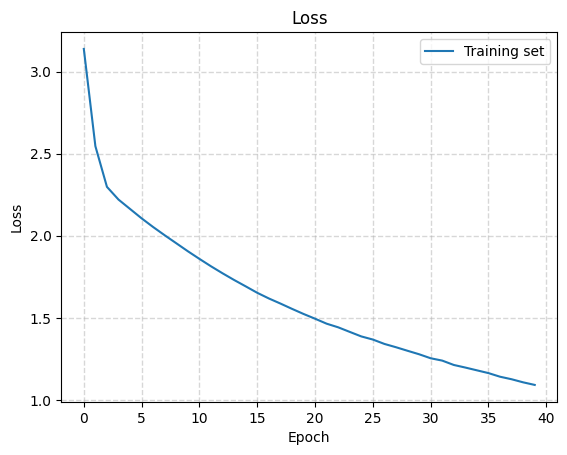

In [74]:
render_training_history(history)

In [75]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints\\ckpt_40'

In [76]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, lstm_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 100)            7800      
                                                                 
 lstm_1 (LSTM)               (1, None, 256)            365568    
                                                                 
 dense_1 (Dense)             (1, None, 78)             20046     
                                                                 
Total params: 393,414
Trainable params: 393,414
Non-trainable params: 0
_________________________________________________________________


In [78]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [80]:
# Generate the text with default temperature (1.0).
print(generate_text(model, start_string=u"Jaka"))

Jakap7 Abekannya. Perisi lalus men'hadil perayahan. 
Sebelelecir kepada 
Bawang Kerutanya mengabung dan anah 
itu."! 
...n, becaraan mengapa istana. 
"Aku in iku menjadi kemudanya 
membukat letuhu-kaya wawang 
Yawi Katian yang 
mereka harib kurtu 
Patih Sidapaksa dau, pakaian, Aji Saka 
lakuk munah Nende Ku Wuragil mengginga. Kleting 
Prabu Pawan dumunya. 
Sedurahdekon kepada dari Torog hendap kekaraya memperi?" tanya Si Wuringgil . 
"Kakangkalah katilan ketisa. 
"Nak! ini ke dari bunu kerima kembadu. 
"lnek itu. Memenjak arema 
makul pergiduk akhilkameti tetap gembutu pengungina," kata 
kaun 
bembitan. Ragil Ku, 
aku tidak mau dalam muncus piciruannya. 
"Hai. Akih dapat buba apah dan tempercari cepat. 
Ia tuga) tetapi, mereka tidak itu kembali. Sangkah us terus lebih. 
Patih Sidapaksa merebatkan pala-kastala . Kini Ayahmu," 
"Jika tamudik tamu yang berwargi ke seragi. 
Kuta Bakarsah terus sangan . L~ra Jora Korang ·;i, mari isu aku Akan menemukan. Jaka Tarub menyerawa musaku tati baik

In [81]:
model_name = '../model/ceritarakyat_lstm.h5'
model.save(model_name, save_format='h5')